<a href="https://colab.research.google.com/github/nilberthsouza/HousePricingPredict/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analisys
by Nilberth Souza 

Pandas for data processing and data processing, 
numpy for linear algebra , matplotlib and seaborn to plot the charts

In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
!pip install --upgrade seaborn 
!pip install --upgrade matplotlib
!pip install --upgrade numpy
!pip install --upgrade pandas 
!pip install --upgrade ipython


     |████████████████████████████████| 225kB 6.5MB/s 
  Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.2.1)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.18.3)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)
     |████████████████████████████████| 788kB 6.3MB/s 
     |████████████████████████████████| 358kB 42.9MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.5 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.13.0 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


features that all columns are shown on the screen

imports the dataset train and the dataset test creating dataframes in memory with their names

In [0]:
train = pd.read_csv('https://raw.githubusercontent.com/nilberthsouza/HousePricingPredict/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/nilberthsouza/HousePricingPredict/master/test.csv')


In [3]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
print("qualitative",qualitative)
print("quantitative",quantitative)

qualitative ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
quantitative ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'Wood

### Correlation Matrix 

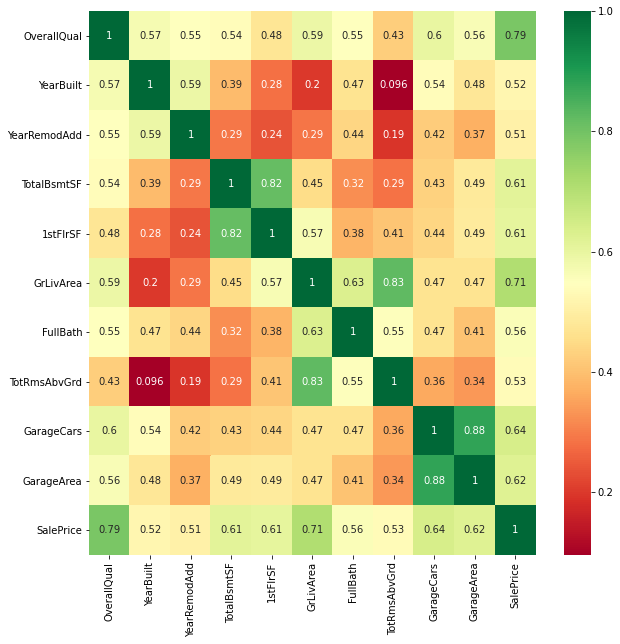

In [4]:
correlatedMatrix = train.corr()
mostCorrelatedFeatures = correlatedMatrix.index[abs(correlatedMatrix["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[mostCorrelatedFeatures].corr(),annot=True,cmap="RdYlGn")

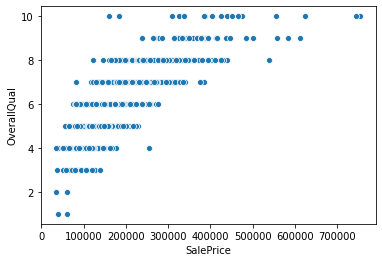

In [5]:
sns.scatterplot(train.SalePrice, train.OverallQual)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


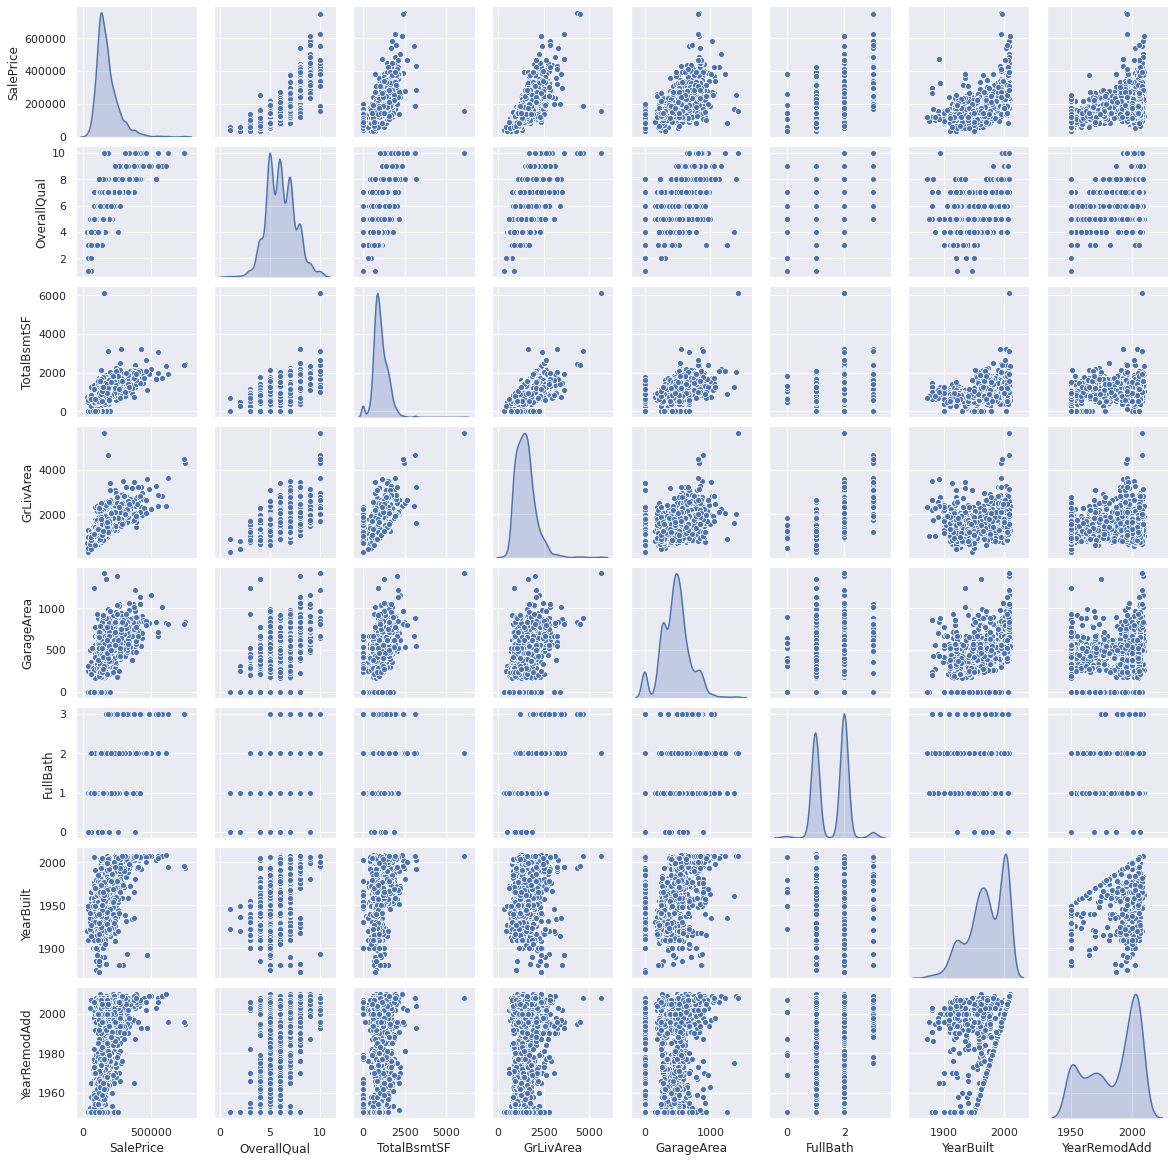

In [7]:
import seaborn as sns
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(train[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

In [0]:
f.head()

NameError: ignored

In [0]:
plt.subplot2grid((0,2),(0,0))
from scipy import stats
sns.distplot(train.SalePrice,fit=stats.norm)

plt.subplot2grid((0,2),(0,1))
from scipy import stats
sns.distplot(train.SalePrice,fit=stats.lognorm)

plt.show()

shapiro-wilk test to know if the data is normally distributed

In [0]:
from scipy import stats
stats.shapiro(train.SalePrice)

In [0]:
train = train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,)

In [0]:
(train.isnull().sum()/train.shape[0]).sort_values(ascending=False)

In [0]:
train.describe()

In [0]:
train.hist(figsize=(15,15))

In [0]:
train[['MSSubClass', 'SalePrice']].groupby(['MSSubClass']).mean()


In [0]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))


sns.barplot(x='MSSubClass', y='SalePrice', data=train, ax=axis1)
sns.barplot(x='MSZoning', y='SalePrice', data=train, ax=axis2)
sns.barplot(x='LotFrontage', y='SalePrice', data=train, ax=axis3)

In [0]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,6)


sns.barplot(x='LotArea', y='SalePrice', data=train, ax=axis1)
sns.barplot(x='Street', y='SalePrice', data=train, ax=axis2)
sns.barplot(x='Alley', y='SalePrice', data=train, ax=axis3)

In [0]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='LotShape',y='SalePrice', data=train, ax=axis1)
sns.barplot(x='LandContour', y='SalePrice',data=train, ax=axis2)
sns.barplot(x='Utilities',y='SalePrice',data=train,ax=axis3)


In [0]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))


sns.barplot(x='LotConfig',y='SalePrice',data=train,ax=axis1)
sns.barplot(x='LandSlope',y='SalePrice',data=train,ax=axis2)
sns.barplot(x='Neighborhood',y='SalePrice',data=train,ax=axis3)

In [0]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))


sns.barplot(x='Condition1',y='SalePrice',data=train,ax=axis1)
sns.barplot(x='Condition2',y='SalePrice',data=train,ax=axis2)
sns.barplot(x='BldgType',y='SalePrice',data=train,ax=axis3)

In [0]:
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

In [0]:
train.shape


In [0]:
names = [train.columns]
print(names)